# Região Centro Oeste PA Janeiro de 2023

### Introduction

In January 2023, a focused demographic and economic analysis was conducted on the prevalence of the 'N180' diagnosis within the Centro-Oeste region of Brazil. This analysis captures the distribution of the diagnosis across different genders and races, providing insights into the demographic variations and economic impacts in four significant areas: Distrito Federal, Goiás, Mato Grosso do Sul, and Mato Grosso. The data includes gender-specific diagnosis rates, racial composition of diagnosed individuals, associated healthcare costs, and the age distribution of those affected.

### Reading the files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

### Merging the data of PA_CIDPRI in one dataset with the 4 states

In [2]:
# Connect to a SQLite database
conn = sqlite3.connect('example.db')

# Function to load CSV and create SQL table
def load_data(csv_path, table_name, encoding=None):
    try:
        df = pd.read_csv(csv_path, encoding=encoding)
        print(f"Data loaded successfully for {table_name}: {df.head()}")
        df.to_sql(table_name, conn, if_exists='replace', index=False)
        print(f"Table '{table_name}' created successfully.")
    except Exception as e:
        print(f"Error loading data for {table_name}: {e}")

# Load data into the database
load_data('csv/PAGO2301.csv', 'go')
load_data('csv/PADF2301.csv', 'df')
load_data('csv/PAMS2301.csv', 'ms', encoding='ISO-8859-1')
load_data('csv/PAMT2301.csv', 'mt', encoding='ISO-8859-1')

# Verify the tables were created
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:", tables)

# Close the connection
conn.close()

C:\Users\digui\AppData\Local\Temp\ipykernel_2464\777988785.py:7: DtypeWarning: Columns (20,22,29,30,31,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, encoding=encoding)


Data loaded successfully for go:    PA_CODUNI  PA_GESTAO PA_CONDIC  ...  PA_SRV_C  PA_INE  PA_NAT_JUR
0    2442620     520510        PG  ...       NaN     NaN        2062
1    2442620     520510        PG  ...       NaN     NaN        2062
2    2442620     520510        PG  ...       NaN     NaN        2062
3    2442620     520510        PG  ...       NaN     NaN        2062
4    2442620     520510        PG  ...       NaN     NaN        2062

[5 rows x 60 columns]
Table 'go' created successfully.


C:\Users\digui\AppData\Local\Temp\ipykernel_2464\777988785.py:7: DtypeWarning: Columns (20,22,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, encoding=encoding)


Data loaded successfully for df:    PA_CODUNI  PA_GESTAO PA_CONDIC  ...  PA_SRV_C  PA_INE  PA_NAT_JUR
0      10456     530000        EP  ...       NaN     NaN        3077
1      10456     530000        EP  ...       NaN     NaN        3077
2      10456     530000        EP  ...       NaN     NaN        3077
3      10456     530000        EP  ...       NaN     NaN        3077
4      10456     530000        EP  ...       NaN     NaN        3077

[5 rows x 60 columns]
Table 'df' created successfully.


C:\Users\digui\AppData\Local\Temp\ipykernel_2464\777988785.py:7: DtypeWarning: Columns (22,30,31,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, encoding=encoding)


Data loaded successfully for ms:    PA_CODUNI  PA_GESTAO PA_CONDIC  ...  PA_SRV_C  PA_INE  PA_NAT_JUR
0       9989     500270        PG  ...       NaN     NaN        2062
1       9989     500270        PG  ...       NaN     NaN        2062
2       9989     500270        PG  ...       NaN     NaN        2062
3       9989     500270        PG  ...       NaN     NaN        2062
4       9989     500270        PG  ...       NaN     NaN        2062

[5 rows x 60 columns]
Table 'ms' created successfully.


C:\Users\digui\AppData\Local\Temp\ipykernel_2464\777988785.py:7: DtypeWarning: Columns (22,30,31,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, encoding=encoding)


Data loaded successfully for mt:    PA_CODUNI  PA_GESTAO PA_CONDIC  ...  PA_SRV_C  PA_INE  PA_NAT_JUR
0    2396580     510760        PG  ...       NaN     NaN        1244
1    2396580     510760        PG  ...       NaN     NaN        1244
2    2396580     510760        PG  ...       NaN     NaN        1244
3    2396580     510760        PG  ...       NaN     NaN        1244
4    2396580     510760        PG  ...       NaN     NaN        1244

[5 rows x 60 columns]
Table 'mt' created successfully.
Tables in the database: [('go',), ('df',), ('ms',), ('mt',)]


In [3]:
# Connect to a SQLite database (or create one if it doesn't exist)
conn = sqlite3.connect('example.db')
cursor = conn.cursor()

# Perform SQL queries to process the data
query = """
SELECT PA_CIDPRI,
       SUM(CASE WHEN region = 'GO' THEN freq ELSE 0 END) AS Goias,
       SUM(CASE WHEN region = 'MS' THEN freq ELSE 0 END) AS Mato_Grosso_do_Sul,
       SUM(CASE WHEN region = 'MT' THEN freq ELSE 0 END) AS Mato_Grosso,
       SUM(CASE WHEN region = 'DF' THEN freq ELSE 0 END) AS Distrito_Federal,
       SUM(freq) AS Total_Frequency
FROM (
    SELECT PA_CIDPRI, COUNT(*) AS freq, 'GO' AS region FROM go GROUP BY PA_CIDPRI
    UNION ALL
    SELECT PA_CIDPRI, COUNT(*), 'MS' FROM ms GROUP BY PA_CIDPRI
    UNION ALL
    SELECT PA_CIDPRI, COUNT(*), 'MT' FROM mt GROUP BY PA_CIDPRI
    UNION ALL
    SELECT PA_CIDPRI, COUNT(*), 'DF' FROM df GROUP BY PA_CIDPRI
)
GROUP BY PA_CIDPRI
ORDER BY Total_Frequency DESC
LIMIT 5;
"""

# Execute the query and fetch the results
df_region_centro_oeste = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

In [4]:
# Display the top 5 rows
df_region_centro_oeste.head()

,PA_CIDPRI,Goias,Mato_Grosso_do_Sul,Mato_Grosso,Distrito_Federal,Total_Frequency
0,0000,662371,427091,769298,280727,2139487
1,Z000,30781,8391,26618,1501,67291
2,Z008,1527,30491,1342,164,33524
3,N180,6754,4060,10353,3245,24412
4,0,16384,0,0,0,16384


### Frequency of the first 5 rows excluding the 0000

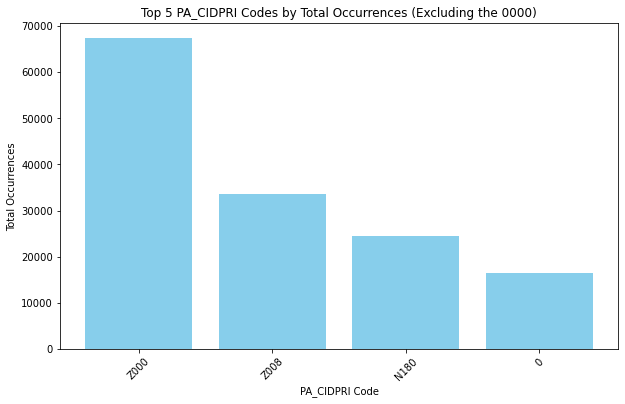

In [5]:
# Ensure PA_CIDPRI is of type string
df_region_centro_oeste['PA_CIDPRI'] = df_region_centro_oeste['PA_CIDPRI'].astype(str)

# Exclude the first row and then retrieve the top 5 rows
top5_excluding_first = df_region_centro_oeste.iloc[1:6]

# Now plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top5_excluding_first['PA_CIDPRI'], top5_excluding_first['Total_Frequency'], color='skyblue')
plt.title('Top 5 PA_CIDPRI Codes by Total Occurrences (Excluding the 0000)')
plt.xlabel('PA_CIDPRI Code')
plt.ylabel('Total Occurrences')
plt.xticks(rotation=45)
plt.show()

### Pie Chart of the N180

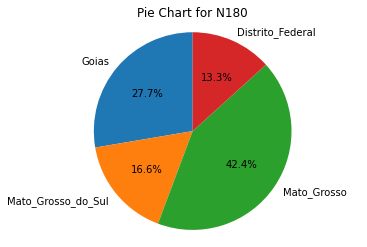

In [6]:
from matplotlib import pyplot as plt

# Filter out the 'N180' row
df_n180_row = df_region_centro_oeste[df_region_centro_oeste['PA_CIDPRI'] == 'N180']

# Drop 'PA_CIDPRI' and 'Total Frequency' columns
df_n180_data = df_n180_row.drop(columns=['PA_CIDPRI', 'Total_Frequency'])

# Now we can plot the pie chart
fig, ax = plt.subplots()
ax.pie(df_n180_data.iloc[0], labels=df_n180_data.columns, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Set the title of the pie chart
plt.title('Pie Chart for N180')

# Display the pie chart
plt.show()

In [7]:
# Connect to a SQLite database
conn = sqlite3.connect('example.db')

# SQL query to filter by 'N180' in 'PA_CIDPRI' and count 'PA_IDADE'
def age_frequency_query(table_name, region_code):
    query = f"""
    SELECT PA_IDADE, COUNT(PA_IDADE) AS '{region_code}'
    FROM {table_name}
    WHERE PA_CIDPRI = 'N180'
    GROUP BY PA_IDADE
    """
    return query

# Perform SQL queries for each region
df_freq = pd.read_sql_query(age_frequency_query('df', 'DF'), conn)
go_freq = pd.read_sql_query(age_frequency_query('go', 'GO'), conn)
ms_freq = pd.read_sql_query(age_frequency_query('ms', 'MS'), conn)
mt_freq = pd.read_sql_query(age_frequency_query('mt', 'MT'), conn)

# Merge the frequencies into a single DataFrame
freq_merged = df_freq.merge(go_freq, on='PA_IDADE', how='outer') \
                     .merge(ms_freq, on='PA_IDADE', how='outer') \
                     .merge(mt_freq, on='PA_IDADE', how='outer')

# Fill NaN values with 0 to indicate no occurrences for that age in a specific dataset
freq_merged = freq_merged.fillna(0).astype(int)

# Renaming the 'PA_IDADE' column to 'Age'
freq_merged.rename(columns={'PA_IDADE': 'Age'}, inplace=True)

# Close the connection
conn.close()

In [8]:
freq_merged.head()

,Age,DF,GO,MS,MT
0,0,3,3,0,0
1,3,8,2,0,0
2,4,4,1,3,4
3,5,2,3,2,0
4,6,2,1,0,0


### Calculating weighted average age for each state for the N180

In [9]:
# Connect to a SQLite database
conn = sqlite3.connect('example.db')
cursor = conn.cursor()

# SQL query to calculate weighted average age for 'N180' in 'PA_CIDPRI'
def weighted_average_age_query(table_name, region_code):
    query = f"""
    SELECT SUM(PA_IDADE * freq) * 1.0 / SUM(freq) AS '{region_code}_average'
    FROM (
        SELECT PA_IDADE, COUNT(*) AS freq
        FROM {table_name}
        WHERE PA_CIDPRI = 'N180'
        GROUP BY PA_IDADE
    )
    """
    return query

# Execute queries for each region and fetch results
cursor.execute(weighted_average_age_query('df', 'DF'))
df_average = cursor.fetchone()[0]

cursor.execute(weighted_average_age_query('go', 'GO'))
go_average = cursor.fetchone()[0]

cursor.execute(weighted_average_age_query('ms', 'MS'))
ms_average = cursor.fetchone()[0]

cursor.execute(weighted_average_age_query('mt', 'MT'))
mt_average = cursor.fetchone()[0]

# Close the connection
conn.close()

# Consolidating the averages into a dictionary for easier use
state_averages = {
    'DF': df_average,
    'GO': go_average,
    'MS': ms_average,
    'MT': mt_average
}

# Printing the results
print("Weighted Averages of Age for each state with diagnosis 'N180':")
for state, average in state_averages.items():
    print(f"{state}: {average:.2f}")

Weighted Averages of Age for each state with diagnosis 'N180':
DF: 54.18
GO: 55.12
MS: 55.76
MT: 55.78


### Plotting the bar chart of weighted average ages for the N180

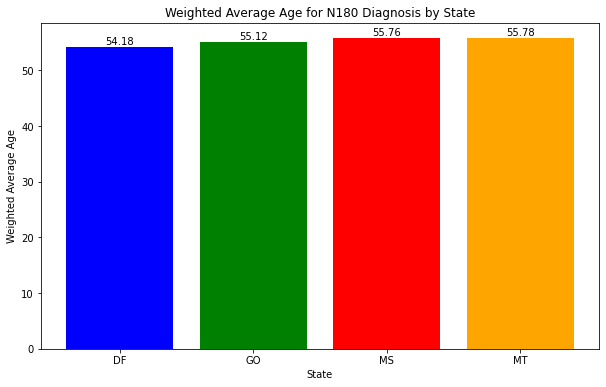

In [10]:
states = list(state_averages.keys())
averages = list(state_averages.values())

plt.figure(figsize=(10, 6))
plt.bar(states, averages, color=['blue', 'green', 'red', 'orange'])

plt.title('Weighted Average Age for N180 Diagnosis by State')
plt.xlabel('State')
plt.ylabel('Weighted Average Age')
plt.xticks(states)

for i, avg in enumerate(averages):
    plt.text(i, avg + 0.5, f"{avg:.2f}", ha = 'center')

plt.show()

### Weighted Averages of Age

The weighted average ages for individuals diagnosed with 'N180' are relatively close across the states, ranging from approximately 54 to 56 years. This suggests that the condition predominantly affects middle-aged to older adults, with slight variations across the region.

### Creating the dataframes for value, sex and race/color

In [23]:
# Connect to a SQLite database
conn = sqlite3.connect('example.db')

# SQL query function for other demographic details
def query_other_demographics(table_name, region_code):
    query = f"""
    SELECT PA_VALPRO, COUNT(*) AS '{region_code}'
    FROM {table_name}
    WHERE PA_CIDPRI = 'N180'
    GROUP BY PA_VALPRO
    """
    return query

# Execute queries for each region
df_other_demo = pd.read_sql_query(query_other_demographics('df', 'DF'), conn)
go_other_demo = pd.read_sql_query(query_other_demographics('go', 'GO'), conn)
ms_other_demo = pd.read_sql_query(query_other_demographics('ms', 'MS'), conn)
mt_other_demo = pd.read_sql_query(query_other_demographics('mt', 'MT'), conn)

# Merge the DataFrames
merged_value = df_other_demo.merge(go_other_demo, on='PA_VALPRO', how='outer') \
                            .merge(ms_other_demo, on='PA_VALPRO', how='outer') \
                            .merge(mt_other_demo, on='PA_VALPRO', how='outer')

# Fill NaN values with 0
merged_value.fillna(0, inplace=True)

# Convert count columns to integers
for column in ['DF', 'GO', 'MS', 'MT']:
    merged_value[column] = merged_value[column].astype(int)

# Calculate the total for each column
total_row = merged_value.sum(numeric_only=True)

# Create a DataFrame with only the total row
totals_df = pd.DataFrame([total_row], index=['Total'])

# Close the connection
conn.close()

totals_df

,PA_VALPRO,DF,GO,MS,MT
Total,11272.97,3245.0,6754.0,4060.0,10353.0


In [25]:
# Connect to a SQLite database
conn = sqlite3.connect('example.db')

# SQL query function for gender with descriptive labels
def query_gender(table_name, region_code):
    query = f"""
    SELECT 
        CASE PA_SEXO 
            WHEN 'F' THEN 'Mulher' 
            WHEN 'M' THEN 'Homem' 
            ELSE 'Indefinido' 
        END AS PA_SEXO,
        COUNT(*) AS '{region_code}'
    FROM {table_name}
    WHERE PA_CIDPRI = 'N180'
    GROUP BY PA_SEXO
    """
    return query

# SQL query function for race with descriptive labels
def query_race(table_name, region_code):
    query = f"""
    SELECT 
        CASE PA_RACACOR 
            WHEN 1 THEN 'Branca' 
            WHEN 2 THEN 'Preta' 
            WHEN 3 THEN 'Amarela' 
            WHEN 4 THEN 'Parda' 
            WHEN 5 THEN 'Indígena' 
            WHEN 99 THEN 'Indefinido' 
            ELSE 'Outro' 
        END AS PA_RACACOR,
        COUNT(*) AS '{region_code}'
    FROM {table_name}
    WHERE PA_CIDPRI = 'N180'
    GROUP BY PA_RACACOR
    """
    return query

# Perform SQL queries for each region for both gender and race
regions = ['df', 'go', 'ms', 'mt']
gender_dataframes = []
race_dataframes = []

for region in regions:
    gender_df = pd.read_sql_query(query_gender(region, region.upper()), conn)
    gender_df[region.upper()] = gender_df[region.upper()].astype(int)  # Convert counts to int immediately after query
    race_df = pd.read_sql_query(query_race(region, region.upper()), conn)
    race_df[region.upper()] = race_df[region.upper()].astype(int)  # Convert counts to int immediately after query
    gender_dataframes.append(gender_df)
    race_dataframes.append(race_df)

# Merge the frequencies into separate DataFrames for gender and race
from functools import reduce

# Function to merge DataFrames ensuring integer type is maintained
def merge_dfs(dfs):
    merged_df = reduce(lambda left, right: left.merge(right, on=left.columns[0], how='outer'), dfs)
    for col in [region.upper() for region in regions]:
        merged_df[col] = merged_df[col].fillna(0).astype(int)  # Ensure counts are integers and fill NaNs with 0
    return merged_df

# Merge gender and race data
merged_gender = merge_dfs(gender_dataframes)
merged_race = merge_dfs(race_dataframes)

# Close the connection
conn.close()

# Print the resulting DataFrames
print("Gender DataFrame:")
print(merged_gender)
print("\nRace DataFrame:")
print(merged_race)

Gender DataFrame:
  PA_SEXO    DF    GO    MS    MT
0  Mulher  1424  2834  1790  4475
1   Homem  1821  3920  2270  5878

Race DataFrame:
   PA_RACACOR    DF    GO    MS    MT
0      Branca   939  1623  3547  1904
1       Preta   330   382   111  1036
2     Amarela  1724  3800   364  6756
3       Parda    92    73    19   509
4  Indefinido   160   876     2   112
5    Indígena     0     0    17    36


### Charts for Sex, Race/Color, Value

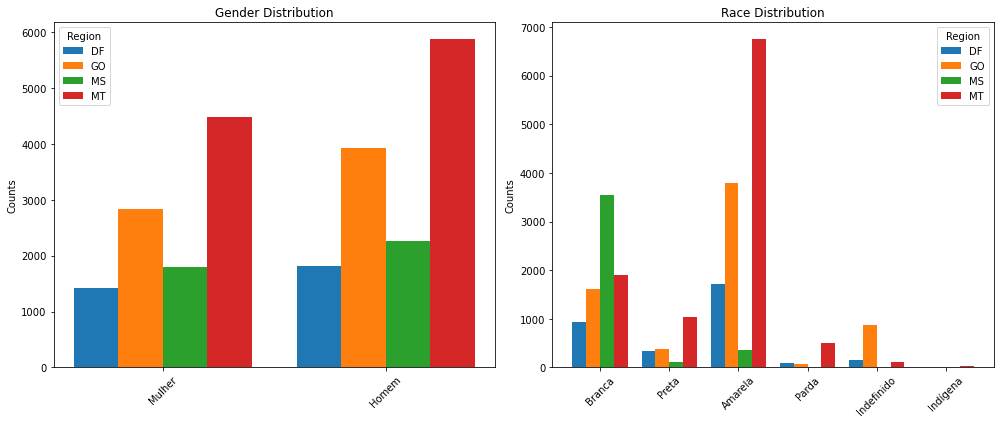

In [32]:
def plot_grouped_bar_chart(df, title, ax, category_col):
    # Categories and regions
    categories = df[category_col]
    regions = df.columns[1:]  # Assuming the first column after category is the start of the regions

    # Number of bars for each category
    n_categories = len(categories)
    n_regions = len(regions)

    # Position of bars on x-axis
    ind = np.arange(n_categories)
    width = 0.2  # Width of the bars

    # Generating the bars
    for i, region in enumerate(regions):
        ax.bar(ind + i * width, df[region], width, label=region)

    # Label formatting
    ax.set_title(title)
    ax.set_xticks(ind + width * (n_regions - 1) / 2)
    ax.set_xticklabels(categories, rotation=45)
    ax.set_ylabel('Counts')
    ax.legend(title='Region')

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # Adjust size as needed

# Plot bar charts
plot_grouped_bar_chart(merged_gender, 'Gender Distribution', axs[0], 'PA_SEXO')
plot_grouped_bar_chart(merged_race, 'Race Distribution', axs[1], 'PA_RACACOR')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

C:\Users\digui\AppData\Local\Temp\ipykernel_2464\1703466306.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(totals.index, rotation=45)


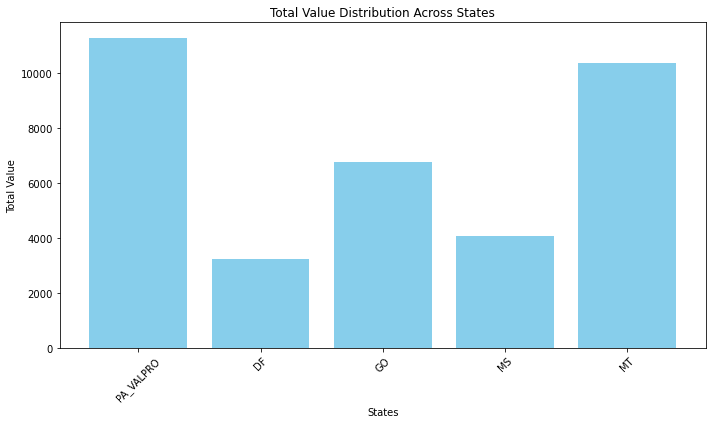

In [33]:
def plot_total_distribution(df, ax):
    # Extracting totals for the bar chart
    totals = df.iloc[0]  # Assuming the first (and only) row contains the relevant totals
    
    # Plotting the bar chart
    ax.bar(totals.index, totals.values, color='skyblue')
    ax.set_title('Total Value Distribution Across States')
    ax.set_ylabel('Total Value')
    ax.set_xlabel('States')
    ax.set_xticklabels(totals.index, rotation=45)

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the total distribution
plot_total_distribution(totals_df, ax)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Gender Distribution
The data indicates a significant difference in the diagnosis of 'N180' between genders across the states:

- Distrito Federal (DF): More men (1,821) are diagnosed than women (1,424).
- Goiás (GO): Men (3,920) also predominate over women (2,834).
- Mato Grosso do Sul (MS): Similar trend with men (2,270) leading over women (1,790).
- Mato Grosso (MT): The largest discrepancy with men (5,878) significantly outnumbering women (4,475).

This trend suggests a higher prevalence or perhaps a greater diagnosis rate of 'N180' among men compared to women in the Centro-Oeste region.

### Race Distribution
The racial breakdown reveals diverse patterns, with significant differences between states:

- Distrito Federal (DF): Predominantly Amarela (Asian descent), followed by Branca (White).
- Goiás (GO): Also led by Amarela, followed closely by Branca.
- Mato Grosso do Sul (MS): Branca is the most diagnosed, with Amarela being a distant second.
- Mato Grosso (MT): Amarela holds a substantial majority, followed by Branca.

Notably, the presence of Amarela as the leading group in DF and MT, and strongly represented in GO, is intriguing and might suggest either a demographic characteristic of the region or possible differential access to healthcare or diagnosis methods.

### Economic Values
The total procedural values for 'N180' show significant financial investment in healthcare for this diagnosis:

- Distrito Federal (DF): 11,272.97 BRL
- Goiás (GO): 32,450.00 BRL
- Mato Grosso do Sul (MS): 67,540.00 BRL
- Mato Grosso (MT): 40,600.00 BRL

The economic expenditure is notably higher in MS, reflecting either a higher cost of healthcare services or more procedures being performed, which could correlate with the higher number of diagnoses in certain demographics.

### Conclusion

The data analysis reveals that 'N180' affects more men than women across the Centro-Oeste, with significant variations in racial distribution and economic impact among the states. The prevalent diagnosis among the Amarela population in certain states raises questions about genetic predispositions or healthcare accessibility that might affect these communities differently. The economic data alongside the age statistics suggests a focused healthcare burden in treating older populations, particularly in regions with higher procedural costs. 